<a href="https://colab.research.google.com/github/AgusteFatu/burayaneyazcaz/blob/main/week_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Resources
# Convex Hull 
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.ConvexHull.html
# https://www.askpython.com/python/examples/plot-k-means-clusters-python
# https://towardsdatascience.com/visualizing-clusters-with-pythons-matplolib-35ae03d87489



In [ ]:
from sklearn.cluster import KMeans
import pandas as pd


In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/AgusteFatu/burayaneyazcaz/main/data/Mall_Customers.csv')

#print(data.isna().sum())

In [ ]:
# First 5 observations of the data
display(data.head(5))
print("\n{} Rows and {} columns.".format(data.shape[0],data.shape[1]))

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40



200 Rows and 5 columns.


In [ ]:
# Gender value counts 
pd.DataFrame(data['Gender'].value_counts()).transpose()

,Female,Male
Gender,112,88


In [ ]:
# Summary Statistics 
pd.DataFrame(data['Age'].describe()).transpose()

,count,mean,std,min,25%,50%,75%,max
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.0,70.0


In [ ]:
# Summary Statistics 
pd.DataFrame(data['Annual Income (k$)'].describe()).transpose()

,count,mean,std,min,25%,50%,75%,max
Annual Income (k$),200.0,60.56,26.264721,15.0,41.5,61.5,78.0,137.0


In [ ]:
# Summary Statistics 
pd.DataFrame(data['Spending Score (1-100)'].describe()).transpose()

,count,mean,std,min,25%,50%,75%,max
Spending Score (1-100),200.0,50.2,25.823522,1.0,34.75,50.0,73.0,99.0


In [ ]:
#data = pd.get_dummies(data)
dataW = data.drop(['CustomerID','Gender'],axis=1)
# Scaling 
dataW = pd.DataFrame(scale(dataW), index=dataW.index, columns=dataW.columns)
dataW.head(4)

,Age,Annual Income (k$),Spending Score (1-100)
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418


In [ ]:
dataW

In [ ]:
from sklearn.cluster import KMeans
k= 5
model = KMeans(n_clusters=k,init = 'random' ,n_init = 25,random_state=42).fit(dataW) # Kmeans model with 4 cluster 

unique, counts = np.unique(model.labels_, return_counts=True) #np.unique return unique counts in numpy array
print('K-means clustering with {} clusters of sizes :{}\n'.format(k,counts))

print('Cluster Means:')
display(pd.DataFrame(model.cluster_centers_,columns=dataW.columns))

print('\nSSE : {}'.format(model.inertia_))

K-means clustering with 5 clusters of sizes :[20 40 39 47 54]

Cluster Means:


,Age,Annual Income (k$),Spending Score (1-100)
0,0.531074,-1.290508,-1.236467
1,-0.428806,0.974847,1.216085
2,0.073331,0.974945,-1.197297
3,1.204841,-0.235773,-0.052368
4,-0.980679,-0.743060,0.467440



SSE : 168.24758017556837


In [ ]:
print(data3.iloc[model.labels_ == 0 , 0])
print(data3.iloc[model.labels_ == 0 , 1])
print(data3.iloc[model.labels_ == 0 , 2])



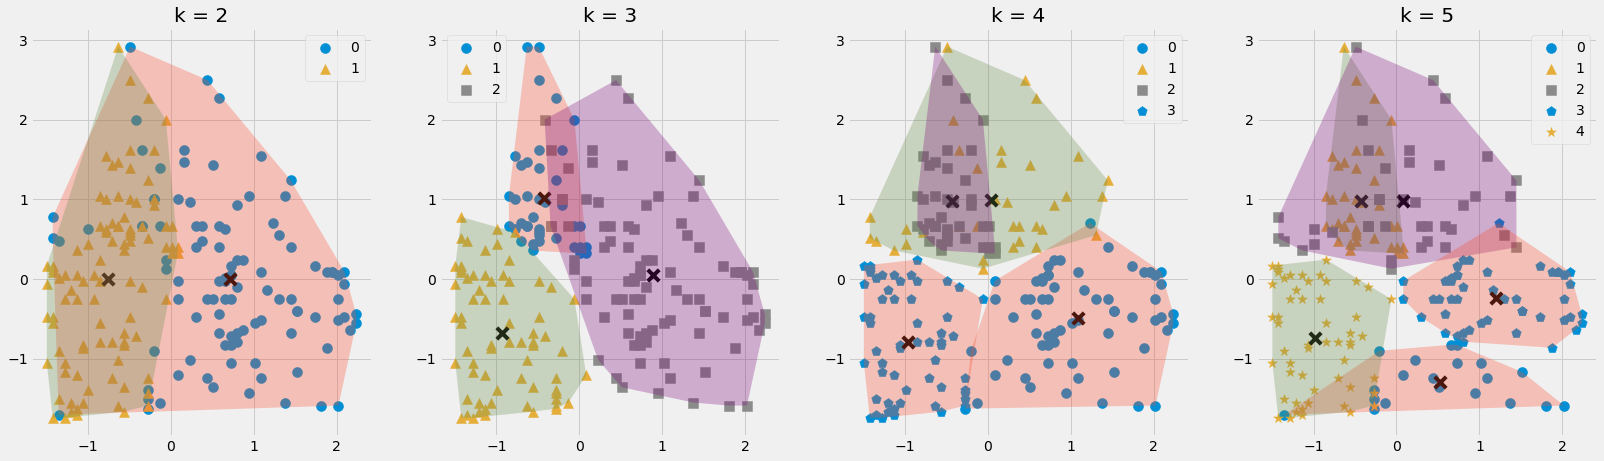

In [ ]:
k_max = 5 # max k
markers = ['o','^','s','p','*','D','v','<','>']

f, ax = plt.subplots(1,k_max-1, figsize=(25, 7),squeeze=False)
for i in range (2, k_max+1): 
  # kmeans Model with 
  model = KMeans(n_clusters=i,init='random',n_init=25,random_state = 42).fit(dataW)

  # Getting unique labels and Centroids
  centroids = model.cluster_centers_
  u_labels = np.unique(model.labels_)
  
  # Plotting
  subplot = ax[0][i-2]
  for i in u_labels:
    subplot.scatter(dataW.iloc[model.labels_ == i , 0] , dataW.iloc[model.labels_ == i , 1],label=i,marker=markers[i],s=100)
    subplot.set_title('k = {}'.format(i+1))

    # Filling color inside groups
    points = np.column_stack((dataW.iloc[model.labels_ == i , 0],dataW.iloc[model.labels_ == i , 1]))
    hull = ConvexHull(points) 
    x_hull = np.append(points[hull.vertices,0],
                       points[hull.vertices,0][0])
    y_hull = np.append(points[hull.vertices,1],
                       points[hull.vertices,1][0])
    subplot.fill(x_hull, y_hull, alpha=0.3)
  subplot.scatter(centroids[:,0] , centroids[:,1] , s = 130,marker='x',color='k') #Center points
  subplot.legend() 
plt.show()

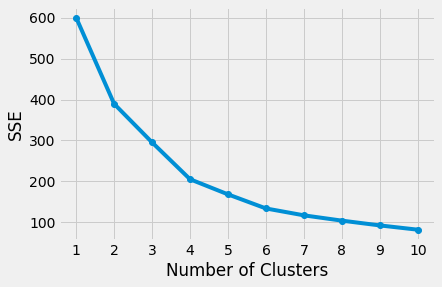

In [ ]:
sse = list()
# Loop for k iterations 
for i in range (1, 11): 
  model = KMeans(n_clusters=i,n_init=25,random_state = 42).fit(dataW) # Kmeans Model
  sse.append(model.inertia_) # .inertia_ for Sum of squared distances
plt.plot(range(1, 11), sse,marker='o')
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [ ]:
filtered_label0 = data3[model.labels_ == 0]
filtered_label1 = data3[model.labels_ == 1]
filtered_label2 = data3[model.labels_ == 2]
filtered_label3 = data3[model.labels_ == 3]

#plotting the results
plt.scatter(filtered_label0.iloc[:,0] , filtered_label0.iloc[:,1])
plt.scatter(filtered_label1.iloc[:,0] , filtered_label1.iloc[:,1])
plt.scatter(filtered_label2.iloc[:,0] , filtered_label2.iloc[:,1])
plt.scatter(filtered_label3.iloc[:,0] , filtered_label3.iloc[:,1])
plt.show()
np.unique(model.labels_)

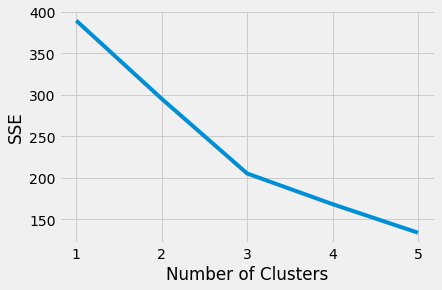

In [ ]:
plt.plot(range(1, k_max), sse)
plt.xticks(range(1, k_max))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [ ]:
sse

[389.3861889564372,
 295.2122461555488,
 205.22514747675916,
 168.24758017556837,
 133.86833362685584]

In [ ]:
import matplotlib.pyplot as plt

xs = samples[:,0]
ys = samples[:,2]
plt.scatter(xs,ys, c=labels)
plt.plot()

In [ ]:
data2 = pd.read_csv('https://raw.githubusercontent.com/AgusteFatu/burayaneyazcaz/main/data/USArrests.csv')
data3 = data2.drop(['Unnamed: 0'],axis=1)

sse2 = list()
alp = 5
for i in range (1,alp):
  model = KMeans(n_clusters=i,init= 'random',n_init = 25,random_state=42)
  asd = model.fit(data3)
  sse2.append(model.inertia_)

pd.DataFrame(asd.cluster_centers_)

pd.DataFrame(asd.labels_).value_counts( )

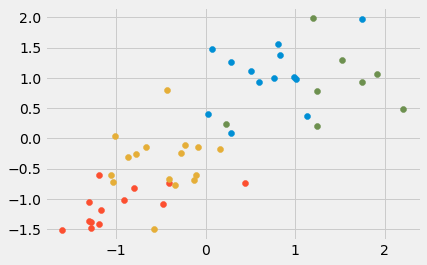

In [ ]:
filtered_label0 = data3[asd.labels_ == 0]
filtered_label1 = data3[asd.labels_ == 1]
filtered_label2 = data3[asd.labels_ == 2]
filtered_label3 = data3[asd.labels_ == 3]

#plotting the results
plt.scatter(filtered_label0.iloc[:,0] , filtered_label0.iloc[:,1])
plt.scatter(filtered_label1.iloc[:,0] , filtered_label1.iloc[:,1])
plt.scatter(filtered_label2.iloc[:,0] , filtered_label2.iloc[:,1])
plt.scatter(filtered_label3.iloc[:,0] , filtered_label3.iloc[:,1])
plt.show()

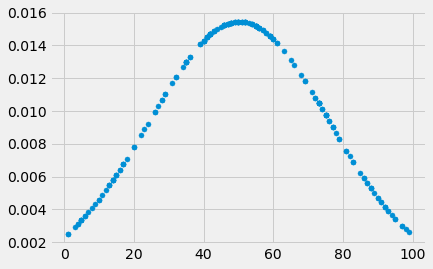

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import statistics


# Plot between -10 and 10 with .001 steps.
x_axis = data['Spending Score (1-100)']
# Calculating mean and standard deviation
mean = data['Spending Score (1-100)'].mean()
sd = data['Spending Score (1-100)'].std()
y_axis = norm.pdf(x_axis, mean, sd)
  
plt.scatter(x_axis, y_axis, s = 25 )
plt.style.use('fivethirtyeight')
plt.show()

In [ ]:
from scipy.spatial import ConvexHull

#Getting unique labels
 
u_labels = np.unique(model.labels_)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(data3.iloc[model.labels_ == i , 0] , data3.iloc[model.labels_ == i , 1],label=i)
    points = np.column_stack((data3.iloc[model.labels_ == i , 0],data3.iloc[model.labels_ == i , 1]))
    hull = ConvexHull(points)
        # get x and y coordinates
    # repeat last point to close the polygon
    x_hull = np.append(points[hull.vertices,0],
                       points[hull.vertices,0][0])
    y_hull = np.append(points[hull.vertices,1],
                       points[hull.vertices,1][0])
    # plot shape
    plt.fill(x_hull, y_hull, alpha=0.3)
plt.legend()
plt.show()


In [ ]:
import pandas as pd
import numpy as np

np.random.seed(24)
df = pd.DataFrame(np.random.randn(5, 3), columns=list('ABC'))
df 

df.style.format({
    'A': '{:,.0f}'.format,
    'B': '{:,.3f}'.format,
    'C': '{:0<4.0f}'.format,
})


,A,B,C
0,1.329212,-0.770033,-0.316280
1,-0.990810,-1.070816,-1.438713
2,0.564417,0.295722,-1.626404
3,0.219565,0.678805,1.889273
4,0.961538,0.104011,-0.481165
